<a href="https://colab.research.google.com/github/Nalinc/codeinjects/blob/master/graphs/traversal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [0]:
def visualizeGraph(graph, representation):
  from_list = []
  to_list = []
  if representation == "adj_list":
    for key in graph:
      for index, item in enumerate(graph[key]):
        from_list.append(key)
        to_list.append(item)
  if representation == "adj_matrix":
    for index_i, row in enumerate(graph):
      for index_j, column in enumerate(row):
        if column:
          from_list.append(index_i)
          to_list.append(index_j)
  if representation == "edge_list":
    for edge in graph:
      from_list.append(edge[0])
      to_list.append(edge[1])

  # from_list = ['D', 'A', 'B', 'C','A']
  # to_list = ['A', 'D', 'A', 'E','C']

  df = pd.DataFrame({ 'from':from_list, 'to':to_list})
  
  # Build your graph. Note that we use the DiGraph function to create the graph!
  G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
  
  # Make the graph
  nx.draw(G, with_labels=True, node_size=1500, alpha=1, arrows=False)


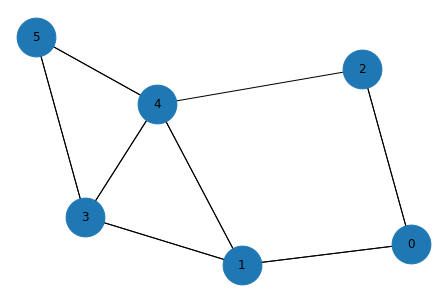

In [45]:
matrix = [
          [0,1,1,0,0,0],
          [1,0,0,1,1,0],
          [1,0,0,0,1,0],
          [0,1,0,0,1,1],
          [0,1,0,1,0,1],
          [0,0,0,1,1,0]
]

edges = [ [0,1], [1,0], [0,2], [2,0], [1,4], [4,1], [1,3], [3,1], [3,4], [4,3], [3,5], [5,3], [4,5], [5,5], [4,2], [2,4] ]
def adj_matrix_to_adj_list(matrix):
  adj_list = { i:[] for i in range(len(matrix))}
  # print(adj_list)
  for index_i,row in enumerate(matrix):
    for index_j,item in enumerate(row):
      # print(item)
      if item:
        adj_list[index_i].append(index_j)
  return adj_list

graph = adj_matrix_to_adj_list(matrix)
visualizeGraph(graph, representation="adj_list")
# visualizeGraph(matrix, representation="adj_matrix")
# visualizeGraph(edges, representation="edge_list")

In [54]:
### Iterative way
# def dfs(root):
#   visited, stack = [], [root]
#   while stack:
#     vertex = stack.pop()
#     if vertex not in visited:
#       visited.append(vertex)
#       stack.extend(set(graph[vertex]) - set(visited))
#   return visited

### Recursive way
visited = [False] * (len(graph))
visited_path = []
def dfs(vertex):
  visited[vertex] = True
  visited_path.append(vertex)
  # print(vertex)
  for neighbour in graph[vertex]: 
    if not visited[neighbour]:
      dfs(neighbour)
  return visited_path
dfs(0)

[0, 1, 3, 4, 5, 2]

[0, 2, 4, 5, 3, 1]